# Predicting Road Accident Risk
**Author:** Brendan Reed  
**Date:** Oct. 28, 2025  
**Objective:** Predict the accident risk based on features pertaining to road conditions and time.


## Introduction

This synthetic dataset simulates real-world road conditions and associated accident risk probabilities. It has been generated to support machine learning tasks focused on predicting accident-prone road segments based on environmental, infrastructural, and temporal variables.

[Kaggle link](https://www.kaggle.com/competitions/playground-series-s5e10/data)

## Imports
In the code cell below, import the necessary Python libraries for this notebook.  

In [1]:
# Import pandas for data manipulation and analysis (we might want to do more with it)
import pandas as pd
# Import matplotlib for creating static visualizations
import matplotlib.pyplot as plt
# Import seaborn for statistical data visualization (built on matplotlib)
import seaborn as sns
# Import train_test_split for splitting data into training and test sets
from sklearn.model_selection import train_test_split
# Import LinearRegression for building a linear regression model
from sklearn.linear_model import LinearRegression
# Import performance metrics for model evaluation
from sklearn.metrics import mean_absolute_error, r2_score, root_mean_squared_error
# Import OneHotEncoder for categorical variables
from sklearn.preprocessing import OneHotEncoder

## Section 1. Load and Explore the Data

### 1.1 Load the dataset and display the first 10 rows

In [2]:
# Load the data
data_frame = pd.read_csv("accident_risk.csv")

# Display just the first 10 rows
data_frame.head(10)

,id,road_type,num_lanes,curvature,speed_limit,lighting,weather,road_signs_present,public_road,time_of_day,holiday,school_season,num_reported_accidents,accident_risk
0,0,urban,2,0.06,35,daylight,rainy,False,True,afternoon,False,True,1,0.13
1,1,urban,4,0.99,35,daylight,clear,True,False,evening,True,True,0,0.35
2,2,rural,4,0.63,70,dim,clear,False,True,morning,True,False,2,0.30
3,3,highway,4,0.07,35,dim,rainy,True,True,morning,False,False,1,0.21
4,4,rural,1,0.58,60,daylight,foggy,False,False,evening,True,False,1,0.56
5,5,highway,3,0.54,70,night,foggy,True,False,morning,False,True,0,0.61
6,6,highway,1,0.04,45,night,foggy,False,True,morning,True,False,2,0.20
7,7,highway,2,0.33,45,daylight,clear,False,True,evening,False,True,0,0.16
8,8,rural,3,0.63,25,dim,clear,True,False,evening,True,True,2,0.18
9,9,urban,4,0.38,45,dim,clear,True,True,afternoon,True,True,2,0.15


In [19]:
data_frame["weather"].unique()

array(['rainy', 'clear', 'foggy'], dtype=object)

### 1.2 Check for missing values and display summary statistics

In the cell below:
1. Use `info()` to check data types and missing values.
2. Use `describe()` to see summary statistics.
3. Use `isnull().sum()` to identify missing values in each column.

In [3]:
data_frame.info()
data_frame.describe()
data_frame.isnull().sum()
print(data_frame.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517754 entries, 0 to 517753
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   id                      517754 non-null  int64  
 1   road_type               517754 non-null  object 
 2   num_lanes               517754 non-null  int64  
 3   curvature               517754 non-null  float64
 4   speed_limit             517754 non-null  int64  
 5   lighting                517754 non-null  object 
 6   weather                 517754 non-null  object 
 7   road_signs_present      517754 non-null  bool   
 8   public_road             517754 non-null  bool   
 9   time_of_day             517754 non-null  object 
 10  holiday                 517754 non-null  bool   
 11  school_season           517754 non-null  bool   
 12  num_reported_accidents  517754 non-null  int64  
 13  accident_risk           517754 non-null  float64
dtypes: bool(4), float64(

Analysis: 

1) <b>How many data instances (also called data records or data rows) are there?</b>  
517754

2) <b>How many features (also columns or attributes) are there?</b>  
14

3) <b>What are the names of the features? ("Feature" is used most often in ML projects.)</b>  
'id', 'road_type', 'num_lanes', 'curvature', 'speed_limit', 'lighting',
       'weather', 'road_signs_present', 'public_road', 'time_of_day',
       'holiday', 'school_season', 'num_reported_accidents', 'accident_risk'

4) <b>Which features are numeric?</b>
id, num_lanes, curvature, speed_limit, num_reported_accidents, accident_risk

5) <b>Which features are categorical (non-numeric)?</b>
road_type, lighting, weather, road_signs_present, public_road, time_of_day, holiday, school_season

6) <b>Are there any missing values? How should they be handled? Should we delete a sparsely populated column? Delete an incomplete data row? Substitute with a different value?</b>  
The data is very clean. There are no missing values.

7) <b>What else do you notice about the dataset? Are there any data issues?</b>  
No issues that I can see.

## Section 2. Visualize Feature Distributions
### 2.1 Create histograms, boxplots, and scatterplots

- Create histograms for all numeric features using `data_frame.hist()` with 30 bins.
- Create a boxenplots using `sns.boxenplot()`.
- Create scatter plots using `sns.pairplot()`.

First, histograms

Generate histograms for all numerical columns

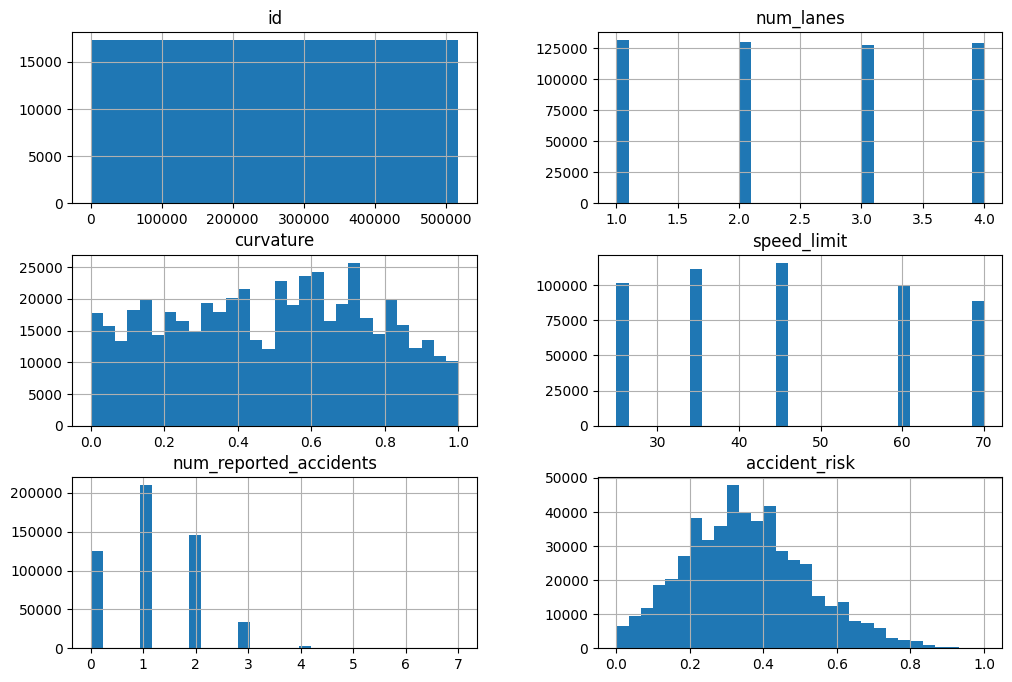

In [4]:
data_frame.hist(bins=30, figsize=(12,8))
plt.show()

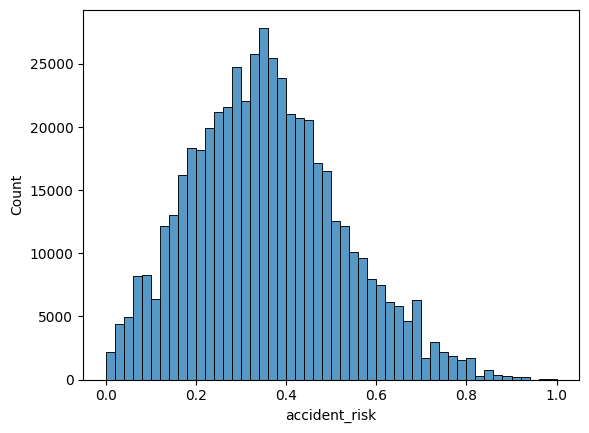

In [ ]:
sns.histplot(data_frame["accident_risk"], bins=50)
plt.show()

Generate one Boxenplot for each column (good for large datasets)

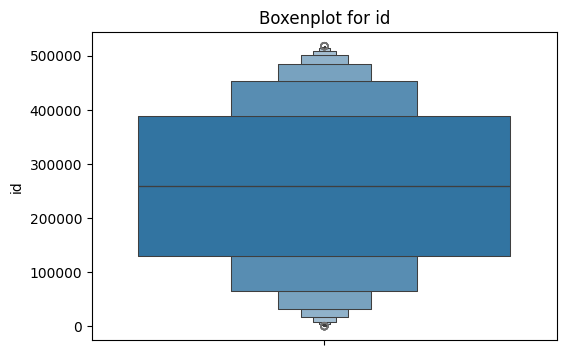

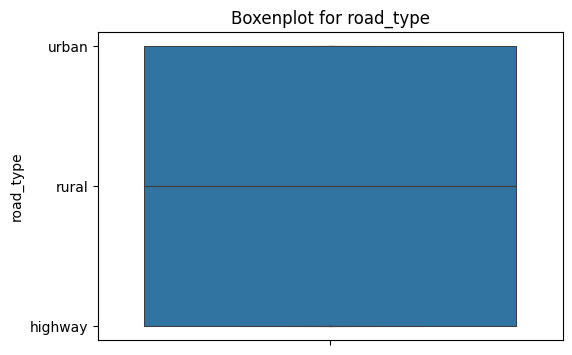

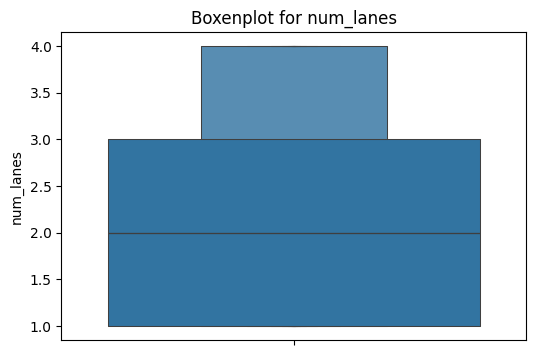

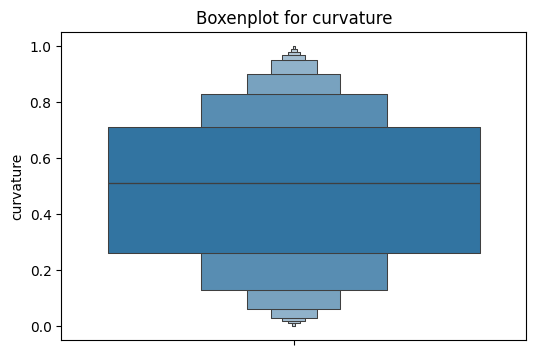

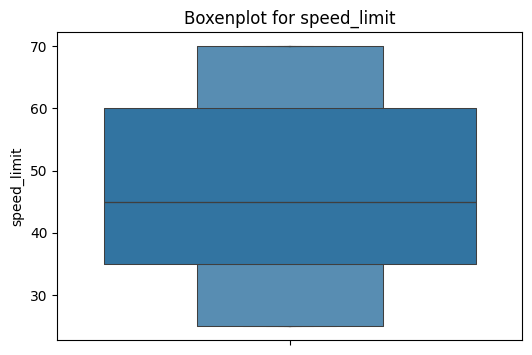

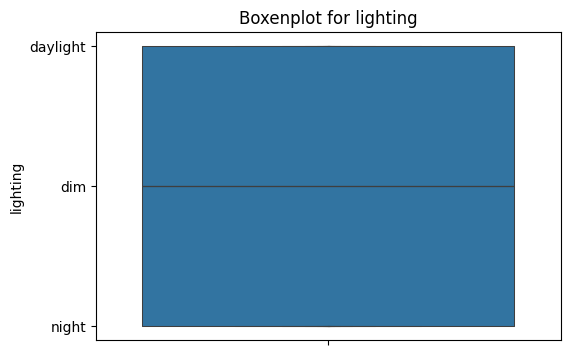

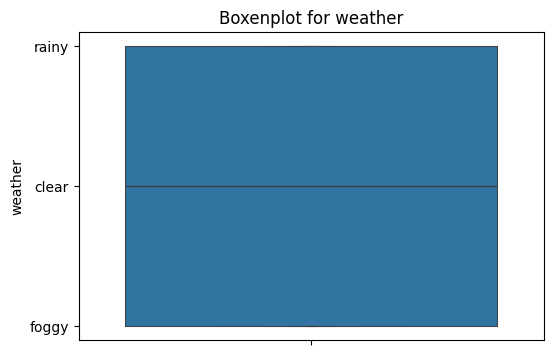

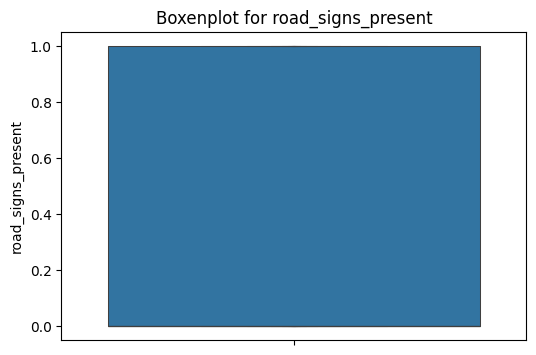

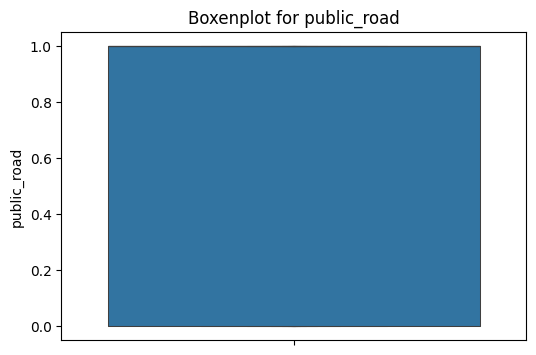

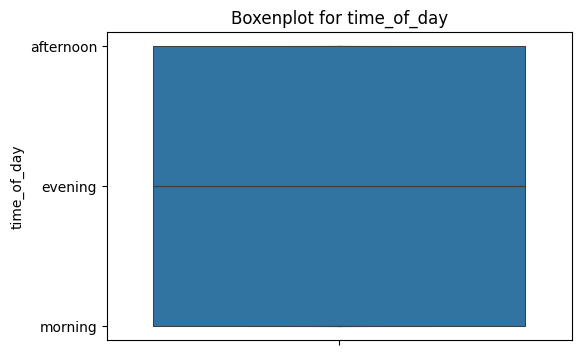

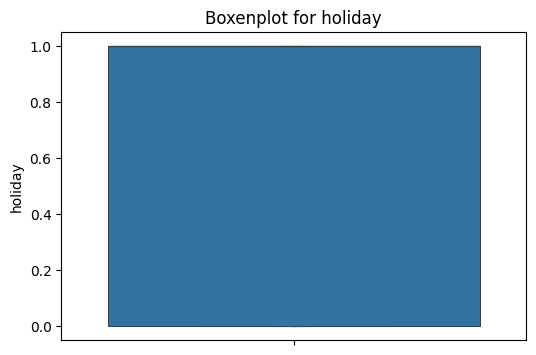

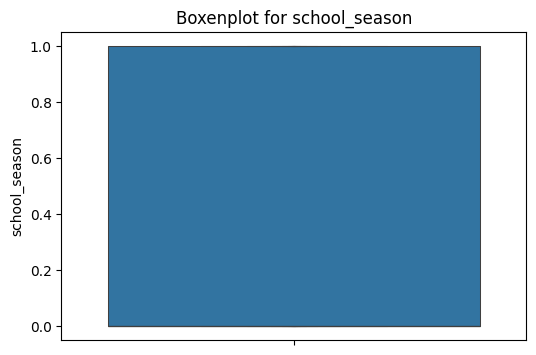

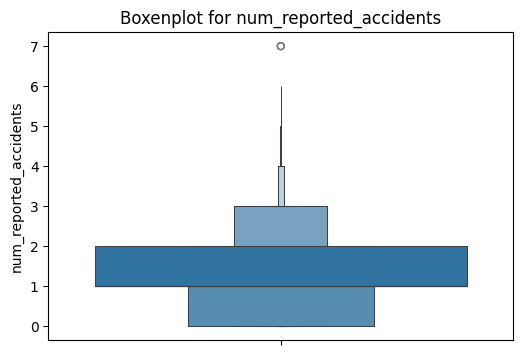

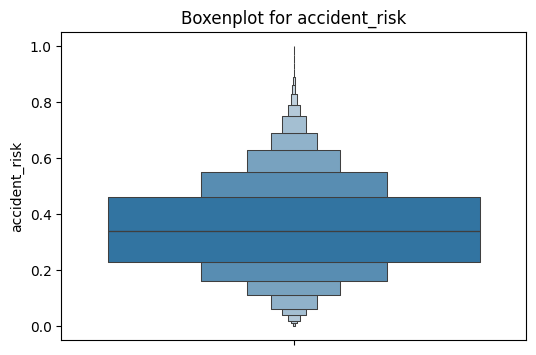

In [6]:
for column in data_frame.columns:
    plt.figure(figsize=(6, 4))
    sns.boxenplot(data=data_frame[column])
    plt.title(f'Boxenplot for {column}')
    plt.show()

Third - Scatter Plots

Generate all Scatter plots (there is a LOT of data, so this will take a while)

Comment out after analysis to speed up the notebook.

In [7]:
# sns.pairplot(data_frame)

# plt.show()

## Section 3. Feature Selection and Justification
### 3.1 Choose two input features for predicting the target


In the following, 
X is capitalized because it represents a matrix (consistent with mathematical notation).
y is lowercase because it represents a vector (consistent with mathematical notation).


First:
- Create a list of contributing features and the target variable
- Define the target feature string (the variable we want to predict)
- Define the input DataFrame
- Define the output DataFrame


Example code:

features: list = ['MedInc', 'AveRooms']

target: str = 'MedHouseVal'

df_X = data_frame[features]

df_y = data_frame[target]  

Added OneHotEncoder to encode road_type, which is a categorical variable.


In [8]:
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded = encoder.fit_transform(data_frame[['road_type']])

encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(['road_type']))

df_X = pd.concat([data_frame[['curvature']], encoded_df], axis=1)
df_y = data_frame['accident_risk']

## Section 4. Train a Linear Regression Model
### 4.1 Split the data
Split the dataset into training and test sets (80% train / 20% test).

Call train_test_split() by passing in: 

- df_X – Feature matrix (input data) as a pandas DataFrame
- y – Target values as a pandas Series
- test_size – Fraction of data to use for testing (e.g., 0.1 = 10%)
- random_state – Seed value for reproducible splits

We'll get back four return values:

- X_train – Training set features (DataFrame)
- X_test – Test set features (DataFrame)
- y_train – Training set target values (Series)
- y_test – Test set target values (Series)


In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    df_X, df_y, test_size=0.2, random_state=42)

### 4.2 Train the model
Create and fit a `LinearRegression` model.

LinearRegression – A class from sklearn.linear_model that creates a linear regression model.

model – An instance of the LinearRegression model. This object will store the learned coefficients and intercept after training.

fit() – Trains the model by finding the best-fit line for the training data using the Ordinary Least Squares (OLS) method.

X_train – The input features used to train the model.

y_train – The target values used to train the model.


In [10]:
model = LinearRegression()

model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


This is a Markdown Cell.

Make predictions for the test set.

The model.predict() method applies this equation to the X test data to compute predicted values.

y_pred = model.predict(X_test)

y_pred contains all the predicted values for all the rows in X_test based on the linear regression model.

In [11]:

y_pred = model.predict(X_test)

### 4.3 Report R^2, MAE, RMSE
Evaluate the model using R^2, MAE, and RMSE.

First:

- Coefficient of Determination (R^2) - This tells you how well the model explains the variation in the target variable. A value close to 1 means the model fits the data well; a value close to 0 means the model doesn’t explain the variation well.



In [12]:
r2 = r2_score(y_test, y_pred)

print(f'R²: {r2:.2f}')

R²: 0.30



Second:

- Mean Absolute Error (MAE) - This is the average of the absolute differences between the predicted values and the actual values. A smaller value means the model’s predictions are closer to the actual values.




In [13]:
mae = mean_absolute_error(y_test, y_pred)

print(f'MAE: {mae:.2f}')


MAE: 0.12



Third:

- Root Mean Squared Error (RMSE) - This is the square root of the average of the squared differences between the predicted values and the actual values. It gives a sense of how far the predictions are from the actual values, with larger errors having more impact.


In [14]:
rmse = root_mean_squared_error(y_test, y_pred)

print(f'RMSE: {rmse:.2f}')


RMSE: 0.14
